In [ ]:
# https://developer.ibm.com/exchanges/data/all/spot-challenge-wildfires/

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
from Skriptai.manofunkcijos import *
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from Skriptai.manofunkcijos import *
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [40]:
submission_example = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/submission-example.csv')
Historical_wildfires = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/Historical_Wildfires.csv')
LandClass = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/LandClass.csv')
VegetationIndex = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/VegetationIndex.csv')
HistoricalWeather = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/HistoricalWeather.csv')
HistoricalWeatherForecasts = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/HistoricalWeatherForecasts.csv')

In [6]:
submission_example.head()

,Region,Date,Estimated_fire_area
0,NWS,1-Feb,25.138971
1,NWS,2-Feb,131.277615
2,NWS,3-Feb,16.896662
3,NWS,4-Feb,30.512019
4,NWS,5-Feb,16.888861


In [105]:
submission_example = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/submission-example.csv')
Historical_wildfires = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/Historical_Wildfires.csv')
LandClass = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/LandClass.csv')
VegetationIndex = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/VegetationIndex.csv')
HistoricalWeather = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/HistoricalWeather.csv')
HistoricalWeatherForecasts = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/HistoricalWeatherForecasts.csv')
Historical_wildfires.head()
Historical_wildfires['Date'] = pd.to_datetime(Historical_wildfires['Date'])
Historical_wildfires['EncodedReplaced'] = LabelEncoder().fit_transform(Historical_wildfires['Replaced'])
Historical_wildfires['EncodedRegion'] = LabelEncoder().fit_transform(Historical_wildfires['Region'])
regions = Historical_wildfires[['Region', 'EncodedRegion']].drop_duplicates()
Historical_wildfires_merged = Historical_wildfires.merge(LandClass, on='Region', how='left')
Historical_wildfires_merged['Month'] = Historical_wildfires_merged['Date'].dt.month
Historical_wildfires_merged['Year'] = Historical_wildfires_merged['Date'].dt.year
Historical_wildfires_merged['Day'] = Historical_wildfires_merged['Date'].dt.day
Historical_wildfires_merged['Day_of_week'] = Historical_wildfires_merged['Date'].dt.weekday
VegetationIndex['Date'] = pd.to_datetime(VegetationIndex['Date'])
VegetationIndex['Month'] = VegetationIndex['Date'].dt.month
VegetationIndex['Year'] = VegetationIndex['Date'].dt.year
VegetationIndex = VegetationIndex.drop('Date', axis=1)
HistoricalWeather['Date'] = pd.to_datetime(HistoricalWeather['Date'])
HistoricalWeather['EncodedParameter'] = LabelEncoder().fit_transform(HistoricalWeather['Parameter'])
HistoricalWeather = HistoricalWeather.drop('Parameter', axis=1)
Historical_wildfires_merged = Historical_wildfires_merged.merge(VegetationIndex, on=['Region', 'Month', 'Year'], how='left')
Historical_wildfires_merged = Historical_wildfires_merged.merge(HistoricalWeather, on=['Region', 'Date'], how='left')
Historical_wildfires_merged['EncodedReplaced'] = LabelEncoder().fit_transform(Historical_wildfires_merged['Replaced'])
Historical_wildfires_merged = Historical_wildfires_merged.drop('Replaced', axis=1)
Historical_wildfires_merged['EncodedRegion'] = LabelEncoder().fit_transform(Historical_wildfires_merged['Region'])
Historical_wildfires_merged = Historical_wildfires_merged.drop('Region', axis=1)
Historical_wildfires_merged = Historical_wildfires_merged.drop('Date', axis=1)
Historical_wildfires_merged = Historical_wildfires_merged.drop('Year', axis=1)
Historical_wildfires_merged = Historical_wildfires_merged.drop('Day_of_week', axis=1)
Historical_wildfires_merged.head()

,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,EncodedReplaced,EncodedRegion,Shrubs,...,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance,count()[unit: km^2],min(),max(),mean(),variance(),EncodedParameter
0,8.68,312.266667,42.4,78.666667,2.886751,8.333333,3,1,0,6.2,...,0.9972,-0.2,0.204862,0.041968,800234.348986,0.000000,22.842566,2.808620,17.383363,0.0
1,8.68,312.266667,42.4,78.666667,2.886751,8.333333,3,1,0,6.2,...,0.9972,-0.2,0.204862,0.041968,800234.348986,31.279930,90.332771,57.095628,267.158378,1.0
2,8.68,312.266667,42.4,78.666667,2.886751,8.333333,3,1,0,6.2,...,0.9972,-0.2,0.204862,0.041968,800234.348986,0.022578,0.444927,0.214293,0.009965,2.0
3,8.68,312.266667,42.4,78.666667,2.886751,8.333333,3,1,0,6.2,...,0.9972,-0.2,0.204862,0.041968,800234.348986,7.576938,33.214062,22.617291,40.255460,3.0
4,8.68,312.266667,42.4,78.666667,2.886751,8.333333,3,1,0,6.2,...,0.9972,-0.2,0.204862,0.041968,800234.348986,12.495799,28.945488,23.055527,9.455474,4.0


In [114]:
columns = Historical_wildfires_merged.columns

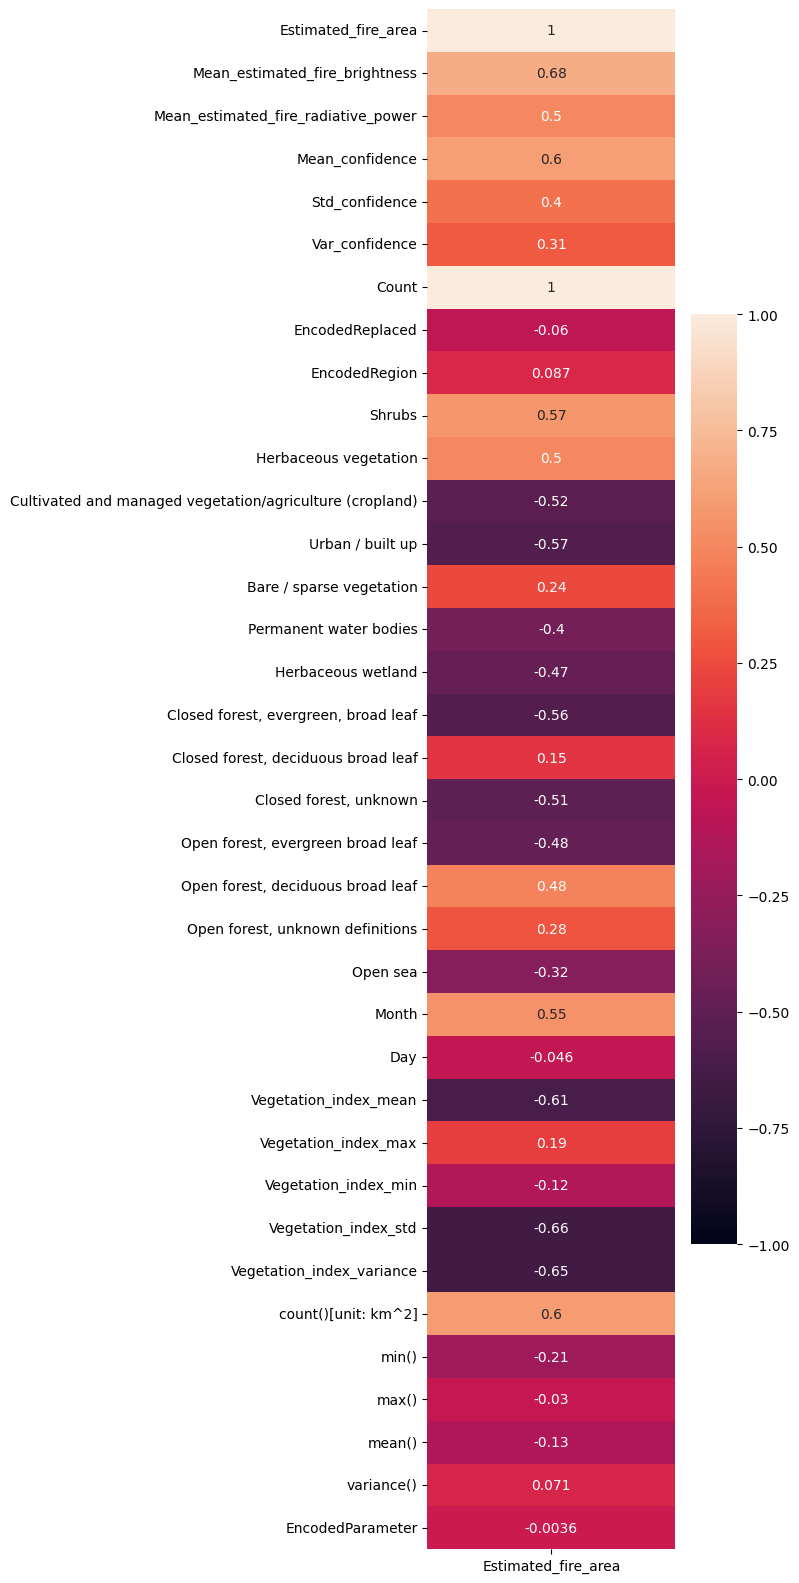

In [106]:
correlation = Historical_wildfires_merged.corr()
fig, axis = plt.subplots(figsize= [4,20])
sns.heatmap(data=correlation.corr()['Estimated_fire_area'].to_frame(), vmin=-1, vmax=1, annot=True, ax=axis)
plt.show()


In [147]:
X_train, X_test, y_train, y_test = train_test_split(Historical_wildfires_merged.drop('Estimated_fire_area', axis=1), Historical_wildfires_merged['Estimated_fire_area'], test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', model.score(X_test, y_test))

Accuracy: 0.9997777660017686


In [153]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Accuracy:', model.score(X_test, y_test))

Mean Squared Error: 22.569133673110017
R2 Score: 0.9997777660017686
Accuracy: 0.9997777660017686


In [49]:
def generate_datetime_range(start, end, freq='H'):
    """
    Sukuria datetime objektų intervalą nuo `start` iki `end` su nurodytu dažniu.
    
    :param start: Pradžios data (datetime objektas arba string formatu 'YYYY-MM-DD HH:MM').
    :param end: Pabaigos data (datetime objektas arba string formatu 'YYYY-MM-DD HH:MM').
    :param freq: Dažnis (pvz., 'H' - valandoms, 'D' - dienoms).
    :return: Pandas DataFrame su datetime objektu ir išskirtais 'month', 'week', 'day', 'hour'.
    """
    date_range = pd.date_range(start=start, end=end, freq=freq)
    df = pd.DataFrame({'datetime': date_range})
    df['month'] = df['datetime'].dt.month
    df['weekday'] = df['datetime'].dt.weekday
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    return df

In [126]:
dates = generate_datetime_range('2021-02-01', '2021-02-28', freq='D')
dates = dates.drop(columns=['datetime', 'weekday','hour'])
regional = []
month = []
day = []
df = pd.DataFrame()
for date in dates.iterrows():
    for region in regions['EncodedRegion']:
        regional.append(region)
        month.append(date[1]['month'])
        day.append(date[1]['day'])
        df = {'EncodedRegion': regional, 'Month': month, 'Day': day}
df = pd.DataFrame(df)
feature_columns = [col for col in Historical_wildfires_merged.columns if col not in ['Month', 'Day', 'EncodedRegion']]
grouped_means = Historical_wildfires_merged.groupby(['Month', 'Day', 'EncodedRegion'])[feature_columns].mean().reset_index()
df = df.merge(grouped_means, on=['Month', 'Day', 'EncodedRegion'], how='left')
df = df[columns]
df

,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,EncodedReplaced,EncodedRegion,Shrubs,...,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance,count()[unit: km^2],min(),max(),mean(),variance(),EncodedParameter
0,175.327180,325.654566,95.842499,89.596555,7.577544,61.874844,82.750000,1.0,0,6.2,...,0.998025,-0.226642,0.195693,0.038418,8.002343e+05,8.388961,32.592703,17.604746,70.265310,2.5
1,37.982033,320.332229,95.922562,88.062420,6.097900,43.654394,19.875000,1.0,1,18.1,...,1.009800,-0.234550,0.151917,0.023306,1.357561e+06,9.608676,31.589099,18.222915,67.970444,2.5
2,56.041087,319.832079,54.800427,86.879280,7.139803,55.710976,28.400000,1.0,2,9.5,...,1.025900,-0.239187,0.181095,0.032883,1.730605e+06,8.738688,40.680013,20.033734,86.237777,2.5
3,11.625689,321.793444,88.166889,89.404444,7.238993,67.048611,4.400000,1.0,3,24.1,...,0.967840,-0.218280,0.081937,0.006784,9.913151e+05,8.522033,26.097838,16.594596,33.881709,2.5
4,27.698933,313.226667,99.699556,86.280000,8.421098,70.930000,9.000000,1.0,4,0.7,...,0.983350,-0.213450,0.185058,0.034384,6.778526e+04,14.919289,23.987629,19.113996,7.946529,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,37.939263,316.483481,53.495537,87.145320,8.045585,67.864442,17.928571,1.0,2,9.5,...,1.022793,-0.234814,0.181019,0.032869,1.730605e+06,8.583711,36.857131,18.887622,73.208688,2.5
192,10.566250,322.230000,50.910000,91.225000,4.609626,21.383333,3.500000,1.0,3,24.1,...,0.971600,-0.217425,0.085398,0.007354,9.913151e+05,8.980974,34.248667,16.061020,70.365620,2.5
193,1.758000,310.680000,34.380000,84.800000,7.071068,50.000000,1.200000,1.0,4,0.7,...,1.033420,-0.295170,0.193367,0.037486,6.778526e+04,13.143679,23.388485,17.870452,10.270342,2.5
194,10.079000,318.908021,85.428854,85.819792,8.018008,66.050714,4.125000,1.0,5,1.4,...,0.987687,-0.229275,0.210185,0.044210,2.294532e+05,11.245484,24.690995,17.719887,24.419452,2.5


In [107]:
X_tarin = Historical_wildfires_merged.drop('Estimated_fire_area', axis=1)
y_train = Historical_wildfires_merged['Estimated_fire_area']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_tarin, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
prediction_data = df.drop('Estimated_fire_area', axis=1)
predictions = model.predict(prediction_data)

df["Predicted_fire_area"] = predictions

df = df.merge(regions, on='EncodedRegion', how='left')
dates_for_df = generate_datetime_range('2021-02-01', '2021-02-28', freq='D')
df['Date'] = df.merge(dates_for_df, left_on=['Month', 'Day'], right_on=['month', 'day'])['datetime']
df[["Region", "Date", "Predicted_fire_area"]].to_csv("prognozes.csv", index=False)

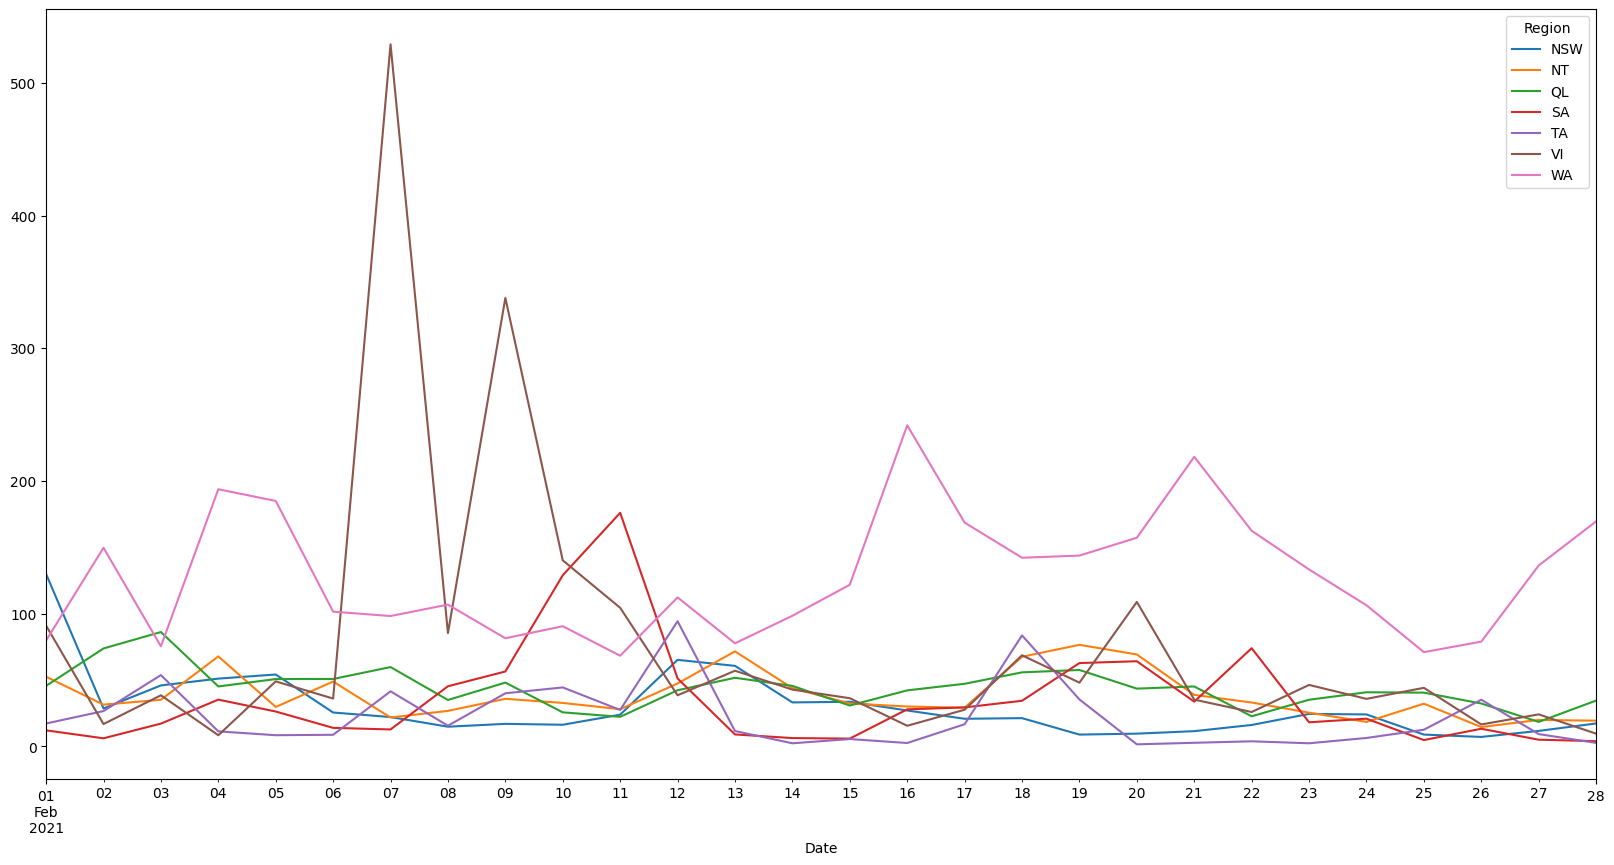

In [ ]:
df_for_lines = df[["Region", "Date", "Predicted_fire_area"]]
df_for_lines = df_for_lines.pivot(index='Date', columns='Region', values='Predicted_fire_area')
df_for_lines.plot(figsize=(20, 10))
plt.show()

In [130]:
Checking_dates = generate_datetime_range('2020-12-01', '2020-12-31', freq='D')

In [ ]:
submission_example = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/submission-example.csv')
Historical_wildfires = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/Historical_Wildfires.csv')
LandClass = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/LandClass.csv')
VegetationIndex = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/VegetationIndex.csv')
HistoricalWeather = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/HistoricalWeather.csv')
HistoricalWeatherForecasts = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/HistoricalWeatherForecasts.csv')
Historical_wildfires.head()
Historical_wildfires['Date'] = pd.to_datetime(Historical_wildfires['Date'])
Historical_wildfires['EncodedReplaced'] = LabelEncoder().fit_transform(Historical_wildfires['Replaced'])
Historical_wildfires['EncodedRegion'] = LabelEncoder().fit_transform(Historical_wildfires['Region'])
regions = Historical_wildfires[['Region', 'EncodedRegion']].drop_duplicates()
Historical_wildfires_merged = Historical_wildfires.merge(LandClass, on='Region', how='left')
Historical_wildfires_merged['Month'] = Historical_wildfires_merged['Date'].dt.month
Historical_wildfires_merged['Year'] = Historical_wildfires_merged['Date'].dt.year
Historical_wildfires_merged['Day'] = Historical_wildfires_merged['Date'].dt.day
Historical_wildfires_merged['Day_of_week'] = Historical_wildfires_merged['Date'].dt.weekday
VegetationIndex['Date'] = pd.to_datetime(VegetationIndex['Date'])
VegetationIndex['Month'] = VegetationIndex['Date'].dt.month
VegetationIndex['Year'] = VegetationIndex['Date'].dt.year
VegetationIndex = VegetationIndex.drop('Date', axis=1)
HistoricalWeather['Date'] = pd.to_datetime(HistoricalWeather['Date'])
HistoricalWeather['EncodedParameter'] = LabelEncoder().fit_transform(HistoricalWeather['Parameter'])
HistoricalWeather = HistoricalWeather.drop('Parameter', axis=1)
Historical_wildfires_merged = Historical_wildfires_merged.merge(VegetationIndex, on=['Region', 'Month', 'Year'], how='left')
Historical_wildfires_merged = Historical_wildfires_merged.merge(HistoricalWeather, on=['Region', 'Date'], how='left')
Historical_wildfires_merged['EncodedReplaced'] = LabelEncoder().fit_transform(Historical_wildfires_merged['Replaced'])
Historical_wildfires_merged = Historical_wildfires_merged.drop('Replaced', axis=1)
Historical_wildfires_merged['EncodedRegion'] = LabelEncoder().fit_transform(Historical_wildfires_merged['Region'])
Historical_wildfires_merged = Historical_wildfires_merged.drop('Region', axis=1)
Historical_wildfires_merged = Historical_wildfires_merged.query('Date < "2020-12-01" or Date > "2020-12-31"')
Historical_wildfires_merged = Historical_wildfires_merged.drop('Date', axis=1)
Historical_wildfires_merged = Historical_wildfires_merged.drop('Year', axis=1)
Historical_wildfires_merged = Historical_wildfires_merged.drop('Day_of_week', axis=1)
Historical_wildfires_merged.head(15)

,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,EncodedReplaced,EncodedRegion,Shrubs,...,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance,count()[unit: km^2],min(),max(),mean(),variance(),EncodedParameter
0,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3,1,0,6.2,...,0.9972,-0.2,0.204862,0.041968,800234.348986,0.000000,22.842566,2.808620,17.383363,0.0
1,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3,1,0,6.2,...,0.9972,-0.2,0.204862,0.041968,800234.348986,31.279930,90.332771,57.095628,267.158378,1.0
2,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3,1,0,6.2,...,0.9972,-0.2,0.204862,0.041968,800234.348986,0.022578,0.444927,0.214293,0.009965,2.0
3,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3,1,0,6.2,...,0.9972,-0.2,0.204862,0.041968,800234.348986,7.576938,33.214062,22.617291,40.255460,3.0
4,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3,1,0,6.2,...,0.9972,-0.2,0.204862,0.041968,800234.348986,12.495799,28.945488,23.055527,9.455474,4.0
5,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3,1,0,6.2,...,0.9972,-0.2,0.204862,0.041968,800234.348986,1.401951,7.364222,4.841764,1.494301,5.0
6,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8,1,0,6.2,...,0.9972,-0.2,0.204862,0.041968,800234.348986,0.000000,7.657155,0.157935,0.273471,0.0
7,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8,1,0,6.2,...,0.9972,-0.2,0.204862,0.041968,800234.348986,24.466665,88.623436,47.170735,195.639724,1.0
8,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8,1,0,6.2,...,0.9972,-0.2,0.204862,0.041968,800234.348986,0.019950,0.442955,0.203951,0.009483,2.0
9,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8,1,0,6.2,...,0.9972,-0.2,0.204862,0.041968,800234.348986,14.087289,33.554867,28.076835,29.763055,3.0


In [139]:
X_tarin = Historical_wildfires_merged.drop('Estimated_fire_area', axis=1)
y_train = Historical_wildfires_merged['Estimated_fire_area']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_tarin, y_train)

RandomForestRegressor(random_state=42)

In [140]:
dates = Checking_dates.drop(columns=['datetime', 'weekday','hour'])
regional = []
month = []
day = []
df = pd.DataFrame()
for date in dates.iterrows():
    for region in regions['EncodedRegion']:
        regional.append(region)
        month.append(date[1]['month'])
        day.append(date[1]['day'])
        df = {'EncodedRegion': regional, 'Month': month, 'Day': day}
df = pd.DataFrame(df)
feature_columns = [col for col in Historical_wildfires_merged.columns if col not in ['Month', 'Day', 'EncodedRegion']]
grouped_means = Historical_wildfires_merged.groupby(['Month', 'Day', 'EncodedRegion'])[feature_columns].mean().reset_index()
df = df.merge(grouped_means, on=['Month', 'Day', 'EncodedRegion'], how='left')
df = df[columns]
df

,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,EncodedReplaced,EncodedRegion,Shrubs,...,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance,count()[unit: km^2],min(),max(),mean(),variance(),EncodedParameter
0,70.041467,319.513346,64.297807,87.029552,5.579694,38.056030,39.916667,1.0,0,6.2,...,0.971850,-0.205911,0.188140,0.035659,8.002343e+05,8.489852,29.955344,16.916310,47.768227,2.5
1,179.930852,323.526794,83.847901,88.644182,7.758340,62.658443,86.933333,1.0,1,18.1,...,0.999160,-0.230407,0.124866,0.015788,1.357561e+06,9.795683,29.473426,17.471634,56.394926,2.5
2,527.094349,322.722638,78.335340,88.713764,7.818780,61.400711,273.733333,1.0,2,9.5,...,1.023067,-0.227333,0.153343,0.023699,1.730605e+06,8.819459,32.655905,17.975606,57.955540,2.5
3,121.663552,331.233910,145.834904,89.401773,6.889194,48.193958,77.000000,1.0,3,24.1,...,0.969867,-0.212744,0.077893,0.006093,9.913151e+05,8.609930,26.605176,16.393647,32.827458,2.5
4,20.954615,321.070513,132.723504,89.358974,4.982268,33.716923,10.000000,1.0,4,0.7,...,0.982133,-0.200000,0.194147,0.037734,6.778526e+04,14.005217,27.273147,20.026101,19.981021,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,243.770333,319.963389,73.399047,87.800427,7.190924,54.074652,126.866667,1.0,2,9.5,...,1.023067,-0.227333,0.153343,0.023699,1.730605e+06,8.292352,37.730968,18.872331,74.907579,2.5
213,53.402792,327.055548,152.496748,90.448585,6.019946,39.865075,21.714286,1.0,3,24.1,...,0.969871,-0.212071,0.078238,0.006154,9.913151e+05,8.729584,28.840043,15.499232,44.235741,2.5
214,62.601186,311.565339,99.195424,91.159322,9.626517,94.644565,32.000000,1.0,4,0.7,...,0.993650,-0.200000,0.161677,0.026170,6.778526e+04,14.206669,23.881322,18.799402,11.394464,2.5
215,203.405115,323.153761,114.268588,91.859704,7.252889,55.902746,99.800000,1.0,5,1.4,...,0.968520,-0.200093,0.205690,0.042461,2.294532e+05,10.578805,26.539671,17.253584,34.256168,2.5


In [141]:
prediction_data = df.drop('Estimated_fire_area', axis=1)
predictions = model.predict(prediction_data)

df["Predicted_fire_area"] = predictions

df = df.merge(regions, on='EncodedRegion', how='left')
dates_for_df = generate_datetime_range('2020-12-01', '2020-12-31', freq='D')
df['Date'] = df.merge(dates_for_df, left_on=['Month', 'Day'], right_on=['month', 'day'])['datetime']
df[["Region", "Date", "Predicted_fire_area"]].to_csv("prognozes2.csv", index=False)

In [143]:
real = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/spot-challenge-wildfires/Jan_09/Jan_09/Historical_Wildfires.csv')
real['Date'] = pd.to_datetime(real['Date'])
real = real.query('Date >= "2020-12-01" and Date <= "2020-12-31"')
real = real[['Region', 'Date', 'Estimated_fire_area']]

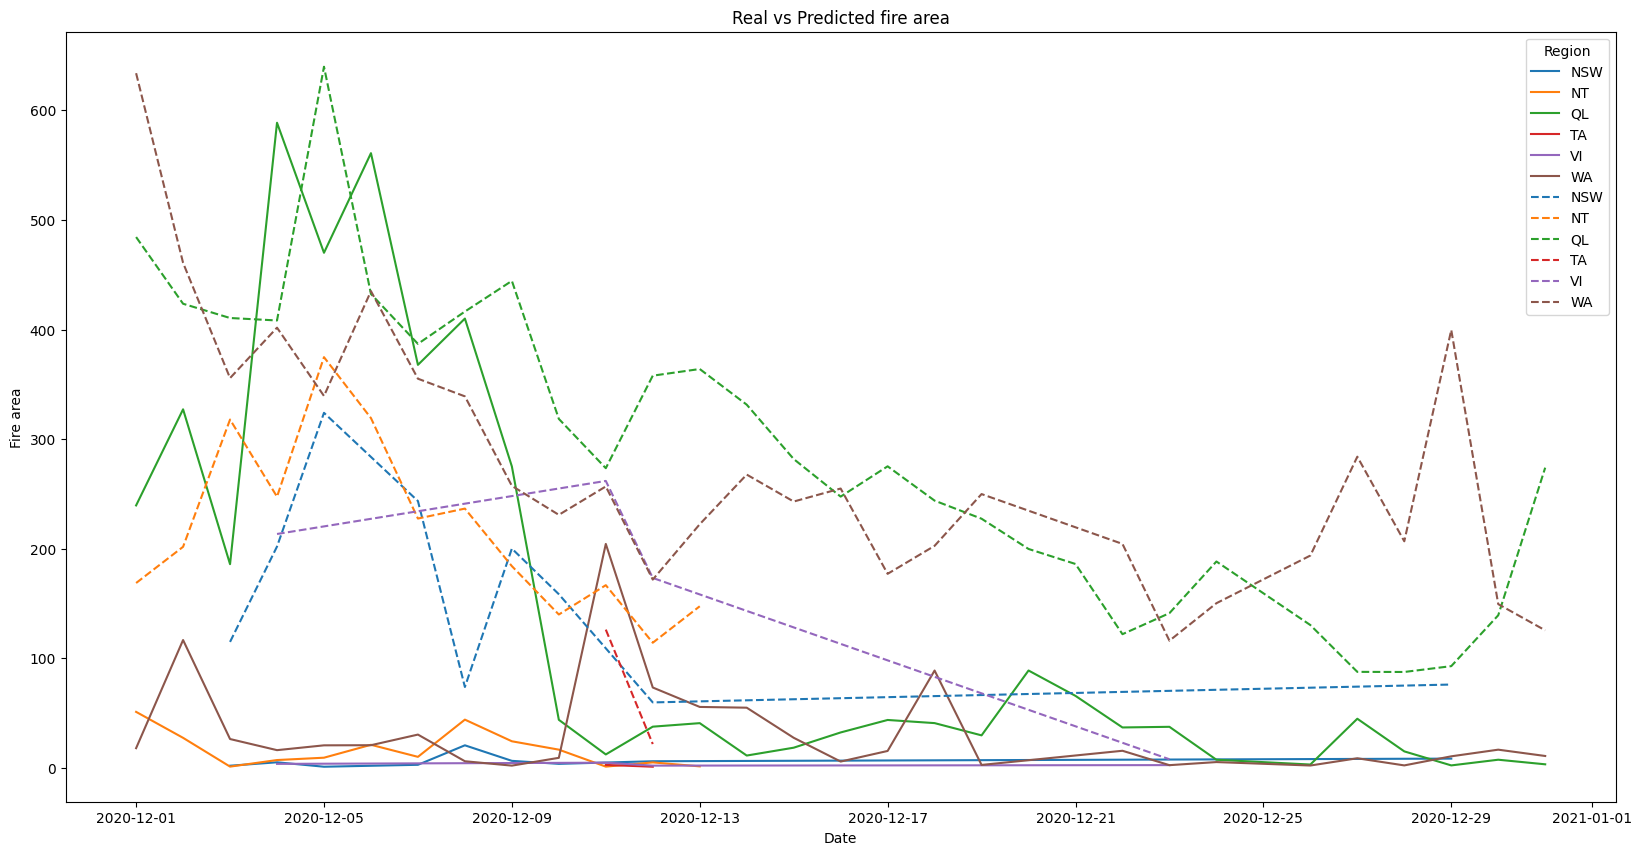

In [ ]:
predicted = pd.read_csv('prognozes2.csv')
predicted['Date'] = pd.to_datetime(predicted['Date'])
merged = real.merge(predicted, on=['Region', 'Date'], how='left')
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=merged, x='Date', y='Estimated_fire_area', hue='Region', ax=ax)
sns.lineplot(data=merged, x='Date', y='Predicted_fire_area', hue='Region', ax=ax, linestyle='--')
ax.set_title('Real vs Predicted fire area')
ax.set_ylabel('Fire area')
ax.set_xlabel('Date')
plt.show()